In [1]:
import os
from pathlib import Path

import pycountry
import plotly as pl
import plotly.express as px
import pandas as pd
from IPython.display import Image

from pysimple.io import from_tsv

In [2]:
DATA_DIR = Path(os.environ['DATA_DIR'])
birds_path = DATA_DIR / 'birds' / 'birds.tsv'
records_path = DATA_DIR / 'records' / 'records.tsv'

### Record columns 

```
id: the catalogue number of the recording on xeno-canto
gen: the generic name of the species (genus)
sp: the specific name (epithet) of the species (species)
ssp: the subspecies name (subspecific epithet)
en: the English name of the species
rec: the name of the recordist
cnt: the country where the recording was made
loc: the name of the locality
lat: the latitude of the recording in decimal coordinates
lng: the longitude of the recording in decimal coordinates
type: the sound type of the recording (e.g. 'call', 'song', etc). This is generally a comma-separated list of sound types.
url: the URL specifying the details of this recording
file: the URL to the audio file
file-name: the original file name of the audio file
sono: an object with the urls to the four versions of sonograms
lic: the URL describing the license of this recording
q: the current quality rating for the recording
length: the length of the recording in minutes
time: the time of day that the recording was made
date: the date that the recording was made
uploaded: the date that the recording was uploaded to xeno-canto
also: an array with the identified background species in the recording
rmk: additional remarks by the recordist
bird-seen: was the recorded bird visually identified? (yes/no)
playback-used: was playback used to lure the bird? (yes/no)
```

In [3]:
birds = from_tsv(birds_path, usecols='gen,sp,name'.split(','))
birds['gen_sp'] = birds['gen'].str.lower() + '_' + birds['sp'].str.lower()
birds['name'] = birds['name'].str.split(',').str[0]
birds = birds.drop(columns=['gen', 'sp'])

In [ ]:
all_records = from_tsv(records_path, usecols='gen,sp,cnt'.split(','))
all_records['cnt_iso'] = all_records['cnt'].map({c.name: c.alpha_3 for c in pycountry.countries})
all_records['gen_sp'] = all_records['gen'].str.lower() + '_' + all_records['sp'].str.lower()

## 1 All birds

### What are the most popular countries ?

In [ ]:
data = all_records.groupby(['cnt', 'cnt_iso']).size().rename('Records').reset_index()

fig = px.choropleth(
    data,
    locations='cnt_iso',
    color='Records',
    hover_name='cnt',
    color_continuous_scale=px.colors.sequential.Plasma)
fig.update_layout(
    title='Country vs Number of Records in that Country',
    width=900,
    height=500,
    font=dict(family='Courier New, monospace', size=16, color='#7f7f7f')
)
fig.show()

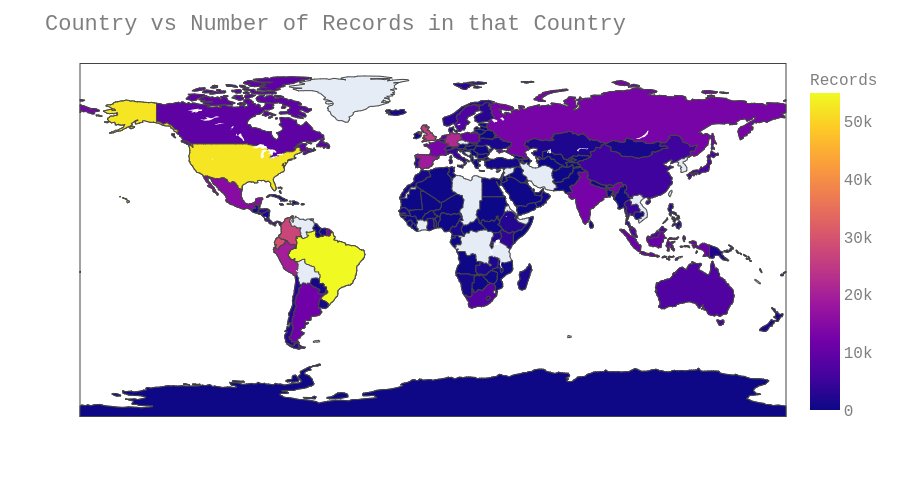

In [44]:
Image("plots/all_birds_countries_choropleth.png")

## 2 Local birds

In [42]:
records = all_records.merge(birds, on='gen_sp')

### What are the most popular birds?

In [ ]:
data = records.groupby('name').size().rename('Records').sort_values().tail(20).reset_index().rename(columns={'name': 'Bird'})

fig = px.bar(data, x='Records', y='Bird', orientation='h')
fig.update_layout(
    title='Country vs Number of records from that country',
    width=800,
    height=600,
    xaxis=dict(tickangle=0, tickfont=dict(size=14), title='Records'),
    yaxis=dict(tickfont=dict(size=14), title=''),
    font=dict(family='Courier New, monospace', size=16, color='#7f7f7f')
)
fig.show()

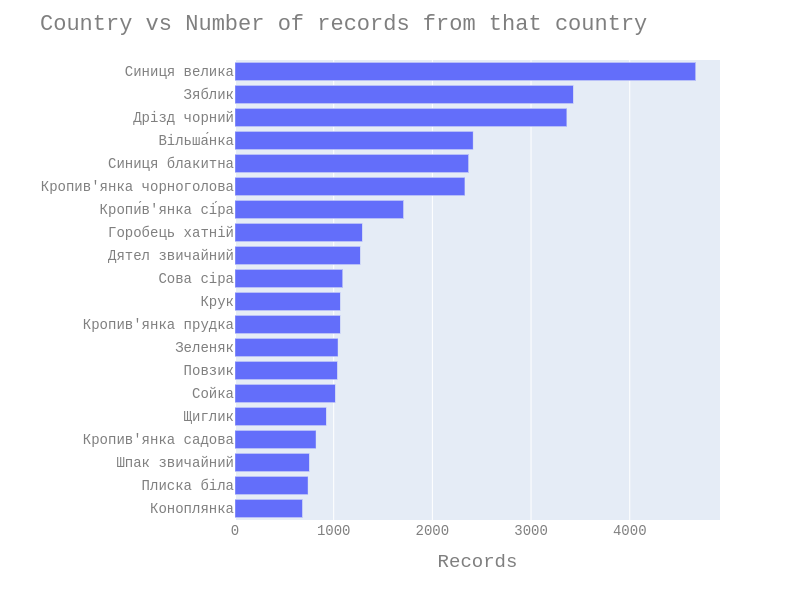

In [45]:
Image("plots/local_birds_barplot.png")

### What are the most popular countries by total number of local birds ?

In [ ]:
data = records.groupby(['cnt', 'cnt_iso']).size().rename('Records').reset_index()

fig = px.choropleth(
    data,
    locations='cnt_iso',
    color='Records',
    hover_name='cnt',
    color_continuous_scale=px.colors.sequential.Plasma)
fig.update_layout(
    title='Country vs Number of Records in that Country',
    width=900,
    height=500,
    font=dict(family='Courier New, monospace', size=16, color='#7f7f7f')
)
fig.show()

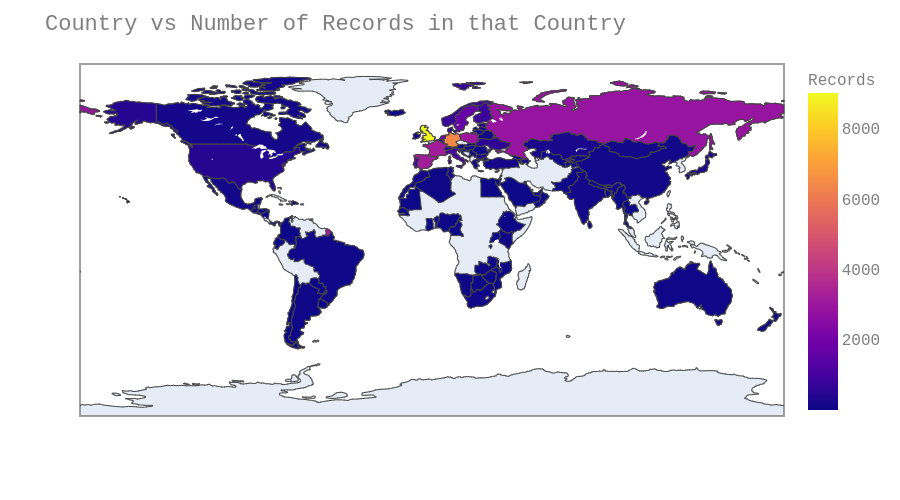

In [47]:
Image("plots/local_birds_countries_choropleth_1.png")

### What are the most popular countries by % of local birds ?

In [ ]:
data     =     records.groupby(['cnt', 'cnt_iso']).size().rename('Records').reset_index()
data_all = all_records.groupby(['cnt', 'cnt_iso']).size().rename('Records_all').reset_index()
data = data_all[data_all['Records_all'].gt(1000)].merge(data, on=['cnt', 'cnt_iso'])
data['Records_%'] = data['Records'].div(data['Records_all'])

fig = px.choropleth(
    data,
    locations='cnt_iso',
    color='Records_%',
    hover_name='cnt',
    color_continuous_scale=px.colors.sequential.Plasma)
fig.update_layout(
    title='Country vs % of Records in that Country',
    width=900,
    height=500,
    font=dict(family='Courier New, monospace', size=16, color='#7f7f7f')
)
fig.show()

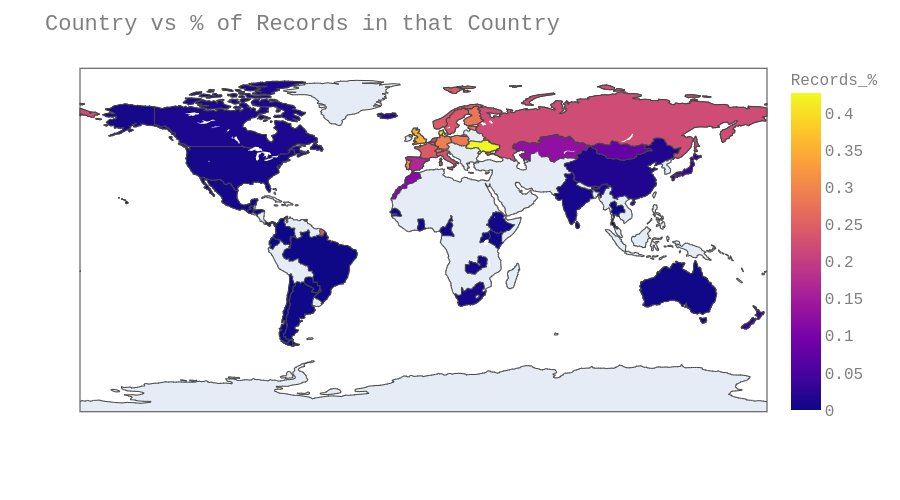

In [50]:
Image("plots/local_birds_countries_choropleth_2.png")